In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Desktop/netflix_titles_nov_2019.csv')

In [3]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


# 1.Type of content available

In [4]:
df.shape

(5837, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [6]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [7]:
# Separting year,and month.Also changed the data type of date column.
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = pd.to_datetime(df['date_added']).dt.year
df['month'] = pd.to_datetime(df['date_added']).dt.month

In [8]:
#splitting season_count
df['season_count'] = df.apply(lambda x: x['duration'].split(" ")[0] if 'Season' in x['duration'] else "",axis=1)

In [9]:
#splitting duration
df['duration'] = df.apply(lambda x: x['duration'].split(" ")[0] if 'Season'  not in x['duration'] else "",axis=1)

In [10]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year,month,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2


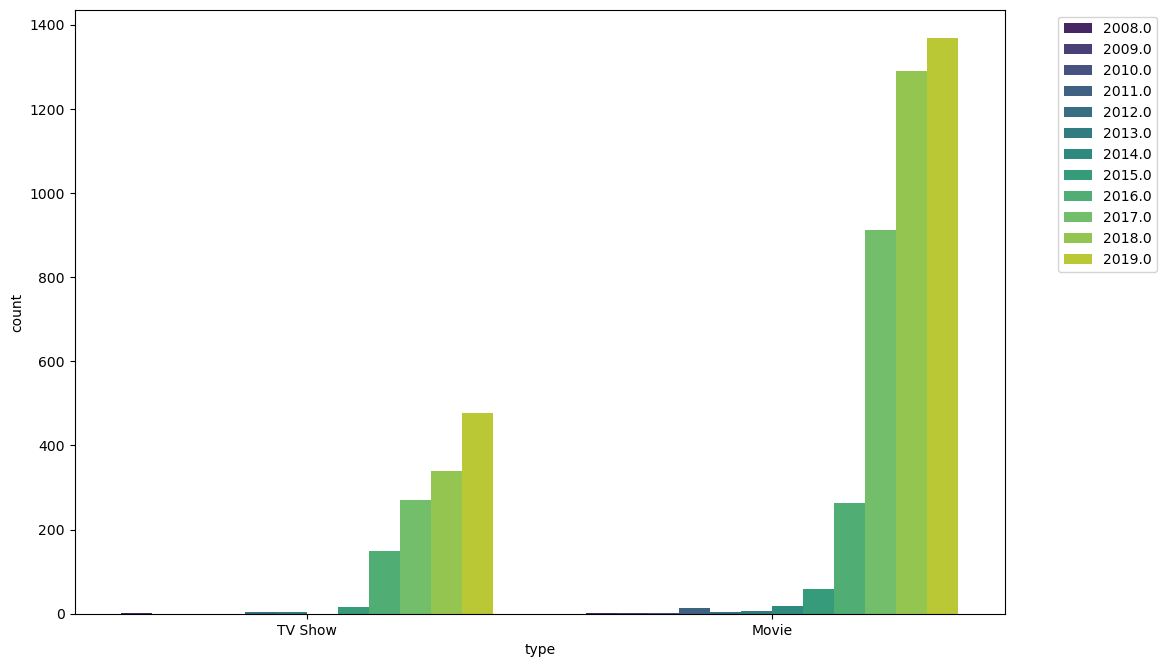

In [11]:
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data=df,x='type',palette='viridis',hue='year')
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='count', ylabel='release_year'>

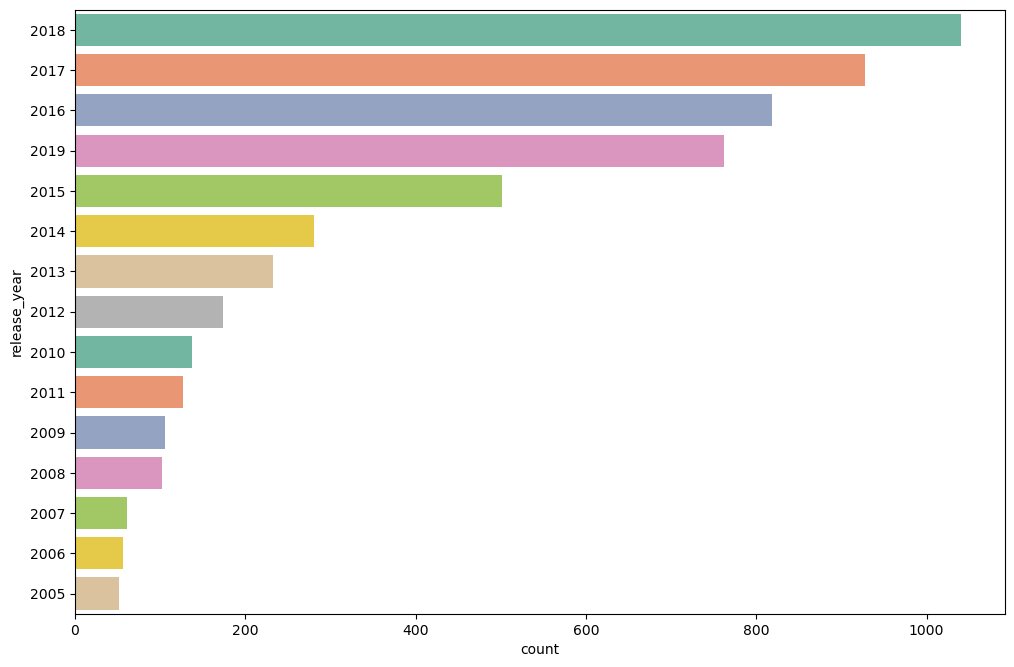

In [12]:
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data=df,y='release_year',palette='Set2',order = df['release_year'].value_counts().index[0:15])

Movie      0.674833
TV Show    0.325167
Name: type, dtype: float64


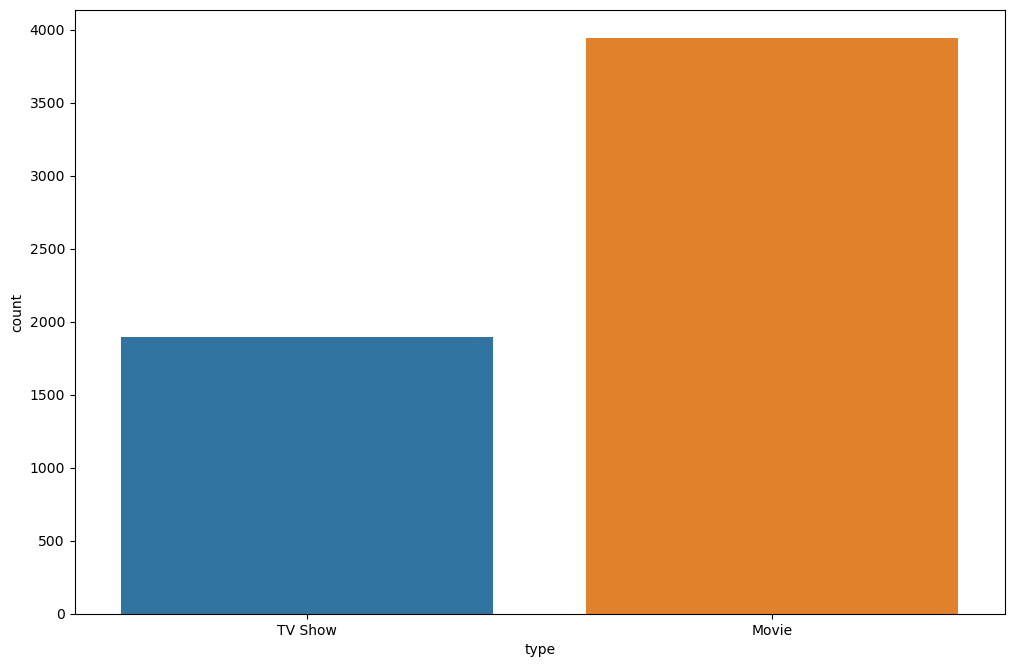

In [13]:
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data=df,x='type')
print(df['type'].value_counts('movie'))

# 2.Some of the oldest Movies

In [14]:
mov = df.sort_values("release_year", ascending = True)
mov = mov[mov['duration'] != '']
mov[['title','release_year']][:15]

,title,release_year
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\nFlying Fortress,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945
4930,San Pietro,1945


# 3. Some of the oldest TV Shows

In [15]:
shows = df.sort_values('release_year',ascending = True)
shows = shows[shows['season_count'] != '']
shows[['title','release_year']][:15]

,title,release_year
2154,Pioneers: First Women Filmmakers*,1925
5143,Pioneers of African-American Cinema,1946
4593,The Twilight Zone (Original Series),1963
4589,The Andy Griffith Show,1967
4266,Star Trek,1968
2623,Monty Python's Fliegender Zirkus,1972
2624,Monty Python's Flying Circus,1974
3503,Dad's Army,1977
3921,El Chavo,1979
2182,Ninja Hattori,1981


# 4.Shows with most no of Seasons

In [16]:
df['season_count'] = pd.to_numeric(df['season_count'])
top = df[['title','season_count']].sort_values(by = 'season_count',ascending=False)

In [17]:
top

,title,season_count
3160,NCIS,15.0
1109,Grey's Anatomy,15.0
1371,Supernatural,14.0
2092,COMEDIANS of the world,13.0
4710,Red vs. Blue,13.0
...,...,...
5831,Even the Rain,NaN
5832,Mad Ron's Prevues from Hell,NaN
5833,Splatter,NaN
5834,Just Another Love Story,NaN


In [18]:
df['season_count'] = pd.to_numeric(df['season_count'])

<AxesSubplot:xlabel='title'>

<Figure size 2400x1600 with 0 Axes>

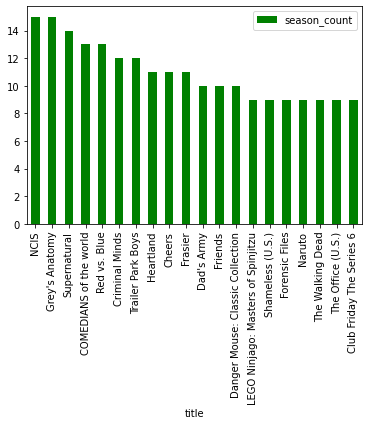

In [19]:
top20 = top[0:20]
plt.figure(figsize = (12,8),dpi=200)
top20.plot(kind='bar',x='title',y = 'season_count',color='green')

In [20]:
df[['title','country']].nunique()

title      5780
country     527
dtype: int64

# 5.Shows with least no of Seasons

In [21]:
df['season_count'] = pd.to_numeric(df['season_count'] )
bottom = df[['title','season_count']].sort_values(by='season_count')

In [22]:
bottom20 = bottom[0:20]

In [23]:
bottom20

,title,season_count
0,Chocolate,1.0
3453,La Piloto,1.0
3435,Troy,1.0
3424,AMO,1.0
3420,"O-Negative, Love Can’t Be Designed",1.0
3419,Lost in Space,1.0
3416,Club Friday To Be Continued - My Beautiful Tomboy,1.0
3406,The Honeymoon Stand Up Special,1.0
3405,The Chalet,1.0
3403,The Adventures of Sonic the Hedgehog,1.0


# 6.Show with genre wise.

In [24]:
category = df['listed_in'].str.split(',',1,expand = True)
category.rename(columns = {0:'genre'},inplace=True)

In [25]:
category = category.drop(1,axis=1)

In [26]:
category

,genre
0,International TV Shows
1,Documentaries
2,Comedies
3,Dramas
4,Kids' TV
...,...
5832,Cult Movies
5833,Horror Movies
5834,Dramas
5835,Stand-Up Comedy & Talk Shows


<AxesSubplot:xlabel='count', ylabel='genre'>

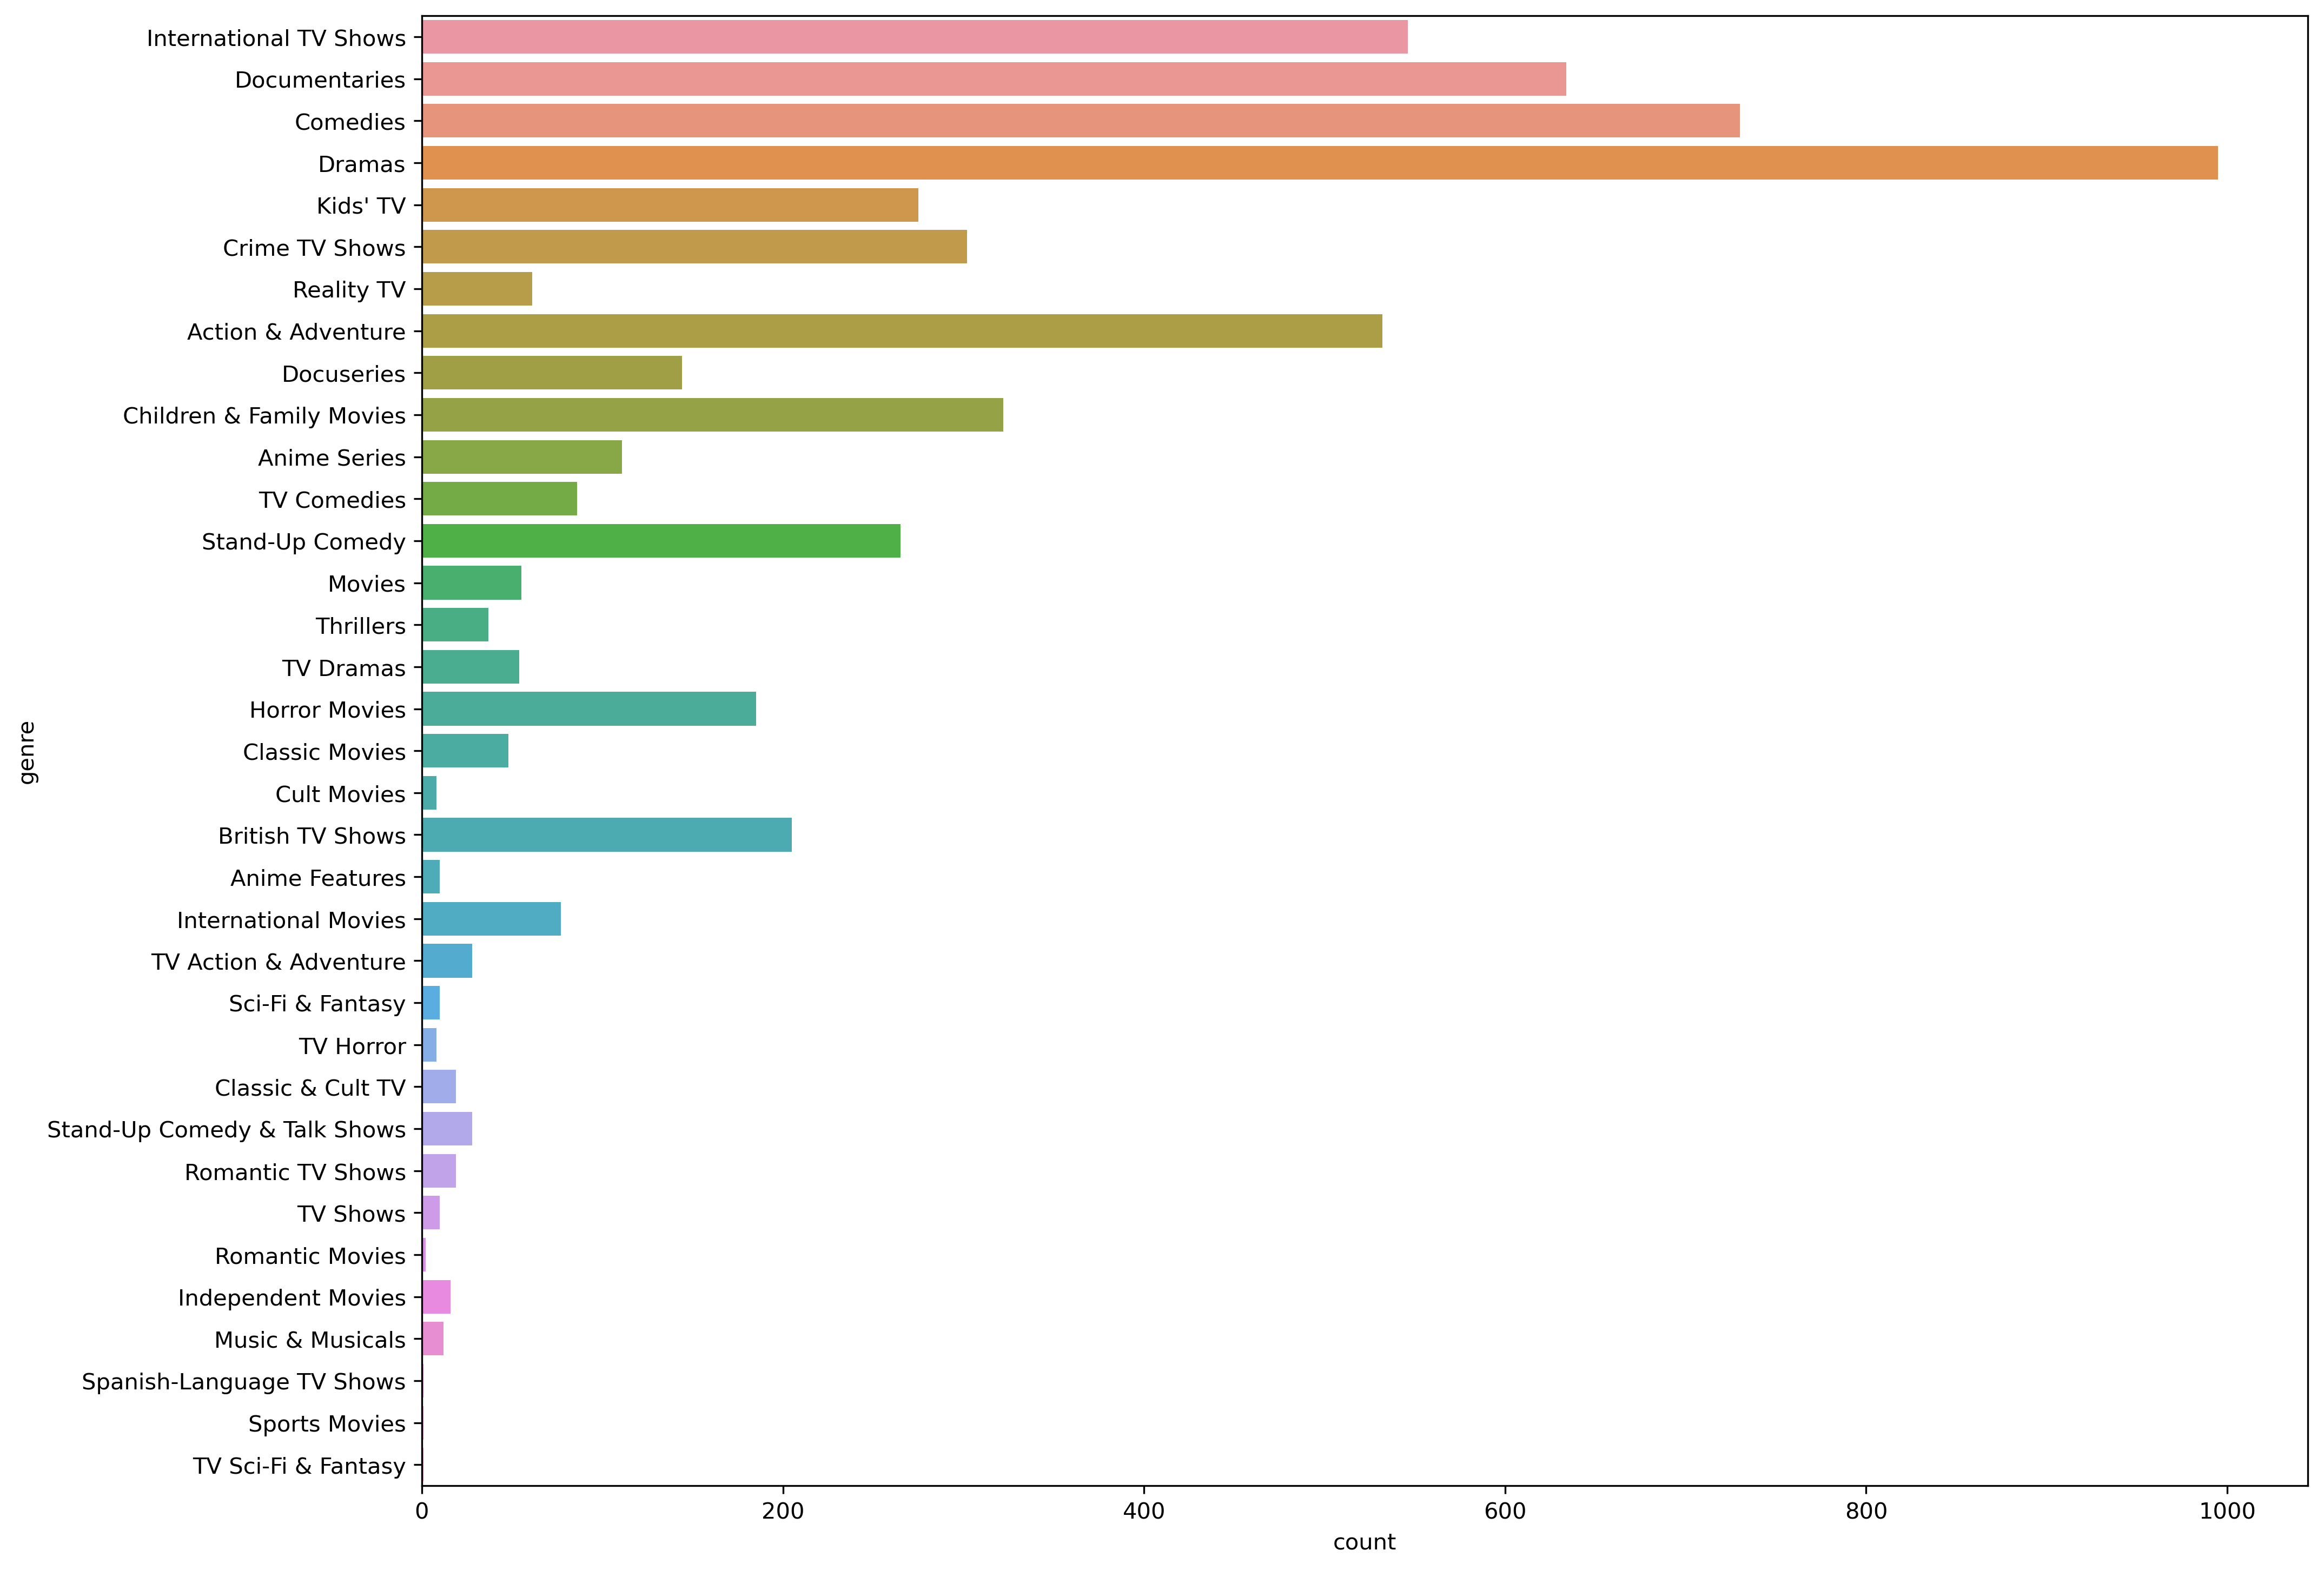

In [27]:
plt.figure(figsize = (15,12),dpi=300)
sns.countplot(y = 'genre',data = category)